# Geometry of the Euclidean Group Lie Algebra

We are talking of the affine Euclidean group in 2 dimensions.

##### The group

We use the following 3D representation:

$$\left \{ \begin{pmatrix} \cos \theta && -\sin \theta && u \\
                           \sin \theta && \cos \theta && v \\
                           0           && 0           && 1 \end{pmatrix}, \forall (\theta, u, v) \in \mathbb{R}^3 \right\}$$
                           
##### Lie Algebra

Here is the matching Lie algebra vectors in $\mathfrak{gl}_3$.

$$L = \begin{pmatrix} 0 && -1 && 0 \\
                  1 && 0 && 0 \\
                  0 && 0 && 0 \end{pmatrix}, D_x = \begin{pmatrix} 0 && 0 && 1 \\
                  0 && 0 && 0 \\
                  0 && 0 && 0 \end{pmatrix},
                  D_y = \begin{pmatrix} 0 && 0 && 0 \\
                  0 && 0 && 1 \\
                  0 && 0 && 0 \end{pmatrix}$$
                  
The Lie algebra is generated by $D_x, D_y, L$ such that:

$$
[D_x, D_y] = 0 \\
[L, D_x] = D_y \\
[L, D_y] = -D_x
$$

##### Killing form

The killing form in the $(D_x, D_y, L)$ basis is given by:

$$\begin{pmatrix} 0 & 0 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & -2 \end{pmatrix}$$

Alternatively, we can verify on a basis that the killing form can be expressed as:

$$k(X, Y) = tr(XY)$$


##### Level sheets of the killing form

It is interesting to understand how the killing form splits the space into level surfaces, because the group action preserves the killing form and thus also preserves thus surfaces.
It follows that each surface is a union of conjugacy classes.

Let $X = \alpha D_x + \beta D_y + \omega L$, we have:

$$k(x) = -2 \omega^2$$ which gives us:

* The plan $\omega = 0$ which is 0 on the L axis
* Pairs of plans given by $\omega = \pm c$, where $c \gt 0$
    
    This level surface is not connected.


## Conjugacy classes in $\mathfrak{A}_2$

##### Null matrix

$\begin{pmatrix} 0 & 0 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & 0 \end{pmatrix}$

Thw null matrix is on the null plane of the killing form: $k(0)=0$

##### Translations of "speed" r

Translations infinitesimal vectors have the form: $D_{(r,\theta)}\begin{pmatrix} 0 & 0 & r\cos\theta\\ 0 & 0 & r\sin\theta \\ 0 & 0 & 0 \end{pmatrix}$, with $r >0$

They commute with all translations in $\mathcal{A}$ and conjugation by a rotation just turns around the direction without changing the norm, so they are all conjugates.

This conjugacy class is a topological __circle__.

##### Rotations of "angular velocity"  $\omega \neq 0$

$\omega L$ rotates around 0 at speed $\omega$.

We can conjugate by $T_{(x,y)} = \begin{pmatrix} 1 & 0 & x \\ 0 & 1 & y \\ 0 & 0 & 1 \end{pmatrix}$

We get $T_{(x,y)}\omega L T_{(x,y)}^{-1} = \omega y D_x - \omega x D_x + \omega L$

So this conjugacy class is the __plane__ $L=\omega$

### Picture of the Lie Algebra

The killing form is invariant by rotations around the L-axis.

So we can have a picture of the $(D_x, L)$ plane then rotate it around the L axis to get the complete view.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import expm

plt.style.use("dark_background")

# our lie basis
L = np.matrix([[0, -1, 0], [1, 0, 0], [0, 0, 0]])
Dx = np.matrix([[0, 0, 1], [0, 0, 0], [0,0,0]])
Dy = np.matrix([[0,0,0],[0,0,1],[0,0,0]])
def colorline(
        x, y, z=None, cmap='copper', norm=plt.Normalize(0.0, 1.0),
        linewidth=3, alpha=1.0):
    """
    http://nbviewer.ipython.org/github/dpsanders/matplotlib-examples/blob/master/colorline.ipynb
    http://matplotlib.org/examples/pylab_examples/multicolored_line.html
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    """
    import matplotlib.collections as mcoll
    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(x))

    # Special case if a single number:
    # to check for numerical input -- this is a hack
    if not hasattr(z, "__iter__"):
        z = np.array([z])

    z = np.asarray(z)

    segments = make_segments(x, y)
    lc = mcoll.LineCollection(segments, array=z, cmap=cmap, norm=norm,
                              linewidth=linewidth, alpha=alpha)

    ax = plt.gca()
    ax.add_collection(lc)

    return lc

def make_segments(x, y):
    """
    Create list of line segments from x and y coordinates, in the correct format
    for LineCollection: an array of the form numlines x (points per line) x 2 (x
    and y) array
    """

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    return segments

ModuleNotFoundError: No module named 'scipy'

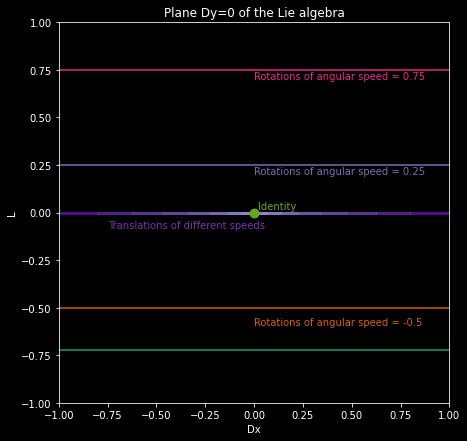

In [8]:
colormap = matplotlib.cm.Dark2.colors
plt.figure(figsize=(7, 7))
t = np.linspace(-1, 1, 20)
plt.plot(t, t*0-0.72, color=colormap[0])
plt.plot(t, t*0-0.5, color=colormap[1])
plt.text(0, -0.59, "Rotations of angular speed = -0.5", color=colormap[1])
plt.plot(t, t*0+0.25, color=colormap[2])
plt.text(0, 0.2, "Rotations of angular speed = 0.25", color=colormap[2])
plt.plot(t, t*0+0.75, color=colormap[3])
plt.text(0, 0.7, "Rotations of angular speed = 0.75", color=colormap[3])
plt.text(-0.75, -0.08, "Translations of different speeds", color="#7B30B2")
colorline(t**2, t*0, cmap='Purples')
colorline(-t**2, t*0, cmap='Purples')
plt.text(0.02, 0.02, "Identity", color=colormap[4])
plt.scatter(0, 0, s=80, color=colormap[4], zorder=10)
plt.title("Plane Dy=0 of the Lie algebra")
plt.xlabel("Dx")
plt.ylabel("L")
plt.xlim(-1.0, 1.0)
plt.ylim(-1.0, 1.0)
None

### Plane of translations (L=0) 
Here we want to plot the plane L=0 of the lie algebra.
This plane is special because it is the union of an infinite number of __displacement conjugacy classes__, each of which is __a circle__.

All the other planes of the type $L=c \neq 0$ contain only a single conjugacy class (rotational movements of a given speed).


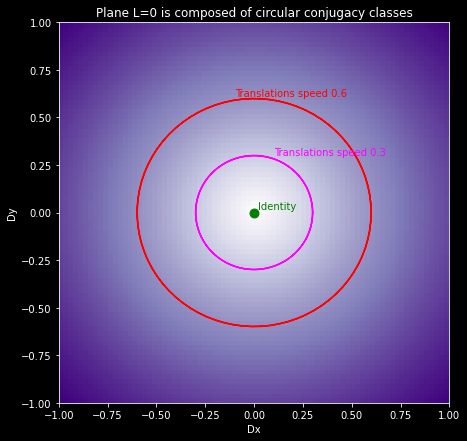

In [9]:
colormap = matplotlib.cm.Dark2_r.colors
plt.figure(figsize=(7, 7))
t = np.linspace(-1, 1, 80)
x, y = np.meshgrid(t, t)
z = (x**2 + y**2)**(1/3)
plt.pcolormesh(x, y, z, cmap="Purples")
plt.text(0.02, 0.02, "Identity", color="green")
plt.scatter(0, 0, s=80, color="green", zorder=10)
plt.plot(0.3*np.cos(2*np.pi*t), 0.3*np.sin(2*np.pi*t), color="magenta")
plt.text(0.1, 0.3, "Translations speed 0.3", color="magenta")
plt.plot(0.6*np.cos(2*np.pi*t), 0.6*np.sin(2*np.pi*t), color="red")
plt.text(-0.1, 0.61, "Translations speed 0.6", color="red")
plt.title("Plane L=0 is composed of circular conjugacy classes")
plt.xlabel("Dx")
plt.ylabel("Dy")
plt.xlim(-1, 1)
plt.ylim(-1, 1)
None

## Check that the Lie algebra basis is "well balanced"

- the operation represented by $\exp({\pi \over 2}L)$ is a quarter turn.
- this operation maps Dx to Dy

In [21]:
# test that 2piL is identity
np.testing.assert_almost_equal(expm(2*np.pi*L), np.identity(3))
# test that piL is not identity
np.testing.assert_almost_equal(
    expm(np.pi*L), 
    np.matrix([[-1, 0, 0], [0, -1, 0], [0, 0, 1]]))
# now we know that pi/2L has order 4
# check that r_90 . Dx = Dy (where the action is given by the conjugation)
r_90 = np.matrix(expm(np.pi/2*L))
np.testing.assert_allclose(
    r_90*Dx*np.linalg.inv(r_90),
    Dy)
# this in itself proves that r_90 has order 4
np.testing.assert_allclose(
    (r_90**2)*Dx*np.linalg.inv(r_90**2),
    -Dx)

## Computations

Move this to another notebook

### Computation of the Killing form

$k(X, Y) = \mathrm{tr}(\mathrm{ad}_X \circ \mathrm{ad}_Y)$

- **k(L, L) = -2**

    $\mathrm{ad}_L \circ \mathrm{ad}_L(X) = [L, [L, X]]$
    
    Which gives:
    $$\mathrm{ad}_L \circ \mathrm{ad}_L(Dx) = -Dx \\
    \mathrm{ad}_L \circ \mathrm{ad}_L(Dy) = -Dy \\
    \mathrm{ad}_L \circ \mathrm{ad}_L(L) = 0 
        $$
    
- **k(Dx, Dx) = 0**

    $\mathrm{ad}_{D_x} \circ \mathrm{ad}_{D_x}(X) = [D_x, [D_x, X]]$
    
    Which gives:
    
    $$
    \mathrm{ad}_{D_x} \circ \mathrm{ad}_{D_x}(D_x) = 0 \\
    \mathrm{ad}_{D_x} \circ \mathrm{ad}_{D_x}(D_y) = 0 \\
    \mathrm{ad}_{D_x} \circ \mathrm{ad}_{D_x}(L) = 0
    $$
    
- **k(Dy, Dy) = 0**

    Same as above
    
- **k(L, Dx) = 0**

    $\mathrm{ad}_{L} \circ \mathrm{ad}_{D_x}(X) = [L, [D_x, X]]$
    
    Which gives:
    
    $$
    \mathrm{ad}_{L} \circ \mathrm{ad}_{D_x}(D_x) = 0 \\
    \mathrm{ad}_{L} \circ \mathrm{ad}_{D_x}(D_y) = [L, [D_x, D_y]] = 0 \\
    \mathrm{ad}_{L} \circ \mathrm{ad}_{D_x}(L) = [L, [D_x, L]] = [L, -D_y] = D_x
    $$